# Język R
## Postawowe informacje
Język programowania oraz implementujący go system R jest środowiskiem do statystycznej analizy danych. Umożliwia pracę interaktywną i skryptową.
 
Instalacja na Ubuntu:

```apt-get install r-base```

Jak dodać kernel R do Jupitera:

https://datatofish.com/r-tutorials/

Linki:
 - Strona główna projektu R: http://www.r-project.org/
 - Quick R: http://www.statmethods.net/
 - RStudio: https://www.rstudio.com/

## Interaktywna praca z systemem

Jest kilka możliwości:

 - Uruchamiamy RStudio, które zawiera zintegrowane środowisko do analizy danych w języku R
 - Można też uruchomić konsolę R bezpośrednio poleceniem R
 - W Jupyter tworzymy nowy notatnik z kernelem R

Wbudowana pomoc:

In [1]:
help()

In [2]:
help(plot)

bieżący katalog

In [3]:
getwd()

[1] "D:/studia/sem4/MOwNiT/lab/lab5"

zmiana katalogu bieżącego
```
setwd("~")
```

#### Proste obliczenia

In [4]:
2+2

[1] 4

Przypisanie 

więcej o rodzajach przypisania: http://stat.ethz.ch/R-manual/R-patched/library/base/html/assignOps.html

In [5]:
a <- 2

In [6]:
a = 2

Działanie:

In [7]:
a * 2

[1] 4

Listy

Funkcja `c()` - konkatenacja

In [8]:
x = c(1,2,3,4)
y = c(2,4,6,8)
z = x*2
z

[1] 2 4 6 8

In [9]:
x+y 

[1]  3  6  9 12

Funkcje

In [10]:
seq(1,10) 

[1]  1  2  3  4  5  6  7  8  9 10

In [11]:
x = seq(1,10)

In [12]:
sum(x)

[1] 55

In [13]:
sqrt(x)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

## Import i przekształcanie danych

R umożliwia wczytywanie danych z baz danych i plików w różnych formatach.

Przykład: import z pliku CSV.

Do importu służy funkcja read.

Przykładowy plik: [data1.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data1.txt)

Kolumny t1 i t2 zawierają wyniki "pomiarów" czasu dla 2 "algorytmów".

In [14]:
results = read.csv("data1.txt")

Zaimportowane dane są w postaci tabeli (data frame).

In [15]:
results

n,t1,t2
1,1.1,2.3
2,2.0,4.1
3,2.8,6.0
4,4.2,8.2
5,5.1,9.9
6,5.9,12.1
7,6.7,14.1
8,8.0,15.9
9,9.1,18.1
10,10.1,19.9


Pobranie kolumny jako wektor kolumnowy:

In [16]:
results[1]

n
1
2
3
4
5
6
7
8
9
10


Pobranie kolumny jako lista:

In [17]:
results[[1]]

[1]  1  2  3  4  5  6  7  8  9 10

pobranie kolumny po nazwie:

In [18]:
results["t1"]

t1
1.1
2.0
2.8
4.2
5.1
5.9
6.7
8.0
9.1
10.1


Pobranie wiersza lub wierszy:

In [19]:
results[2,]

,n,t1,t2
2,2,2,4.1


In [20]:
results[c(2,4,6),]

,n,t1,t2
2,2,2.0,4.1
4,4,4.2,8.2
6,6,5.9,12.1


attach (dodanie tabeli do kontekstu) pozwala na pojedyncze odwołania do kolumn bez odwoływania sie do calej tabeli:

In [21]:
attach(results)
t1

[1]  1.1  2.0  2.8  4.2  5.1  5.9  6.7  8.0  9.1 10.1

In [22]:
t2

[1]  2.3  4.1  6.0  8.2  9.9 12.1 14.1 15.9 18.1 19.9

In [23]:
n

[1]  1  2  3  4  5  6  7  8  9 10

### Rysowanie wykresów

Uzywamy pakietu ggplot2

W przypadku własnej instalacji na początku może być potrzeba doinstalowania pakietu:

```install.packages("ggplot2")```

In [24]:
library("ggplot2")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

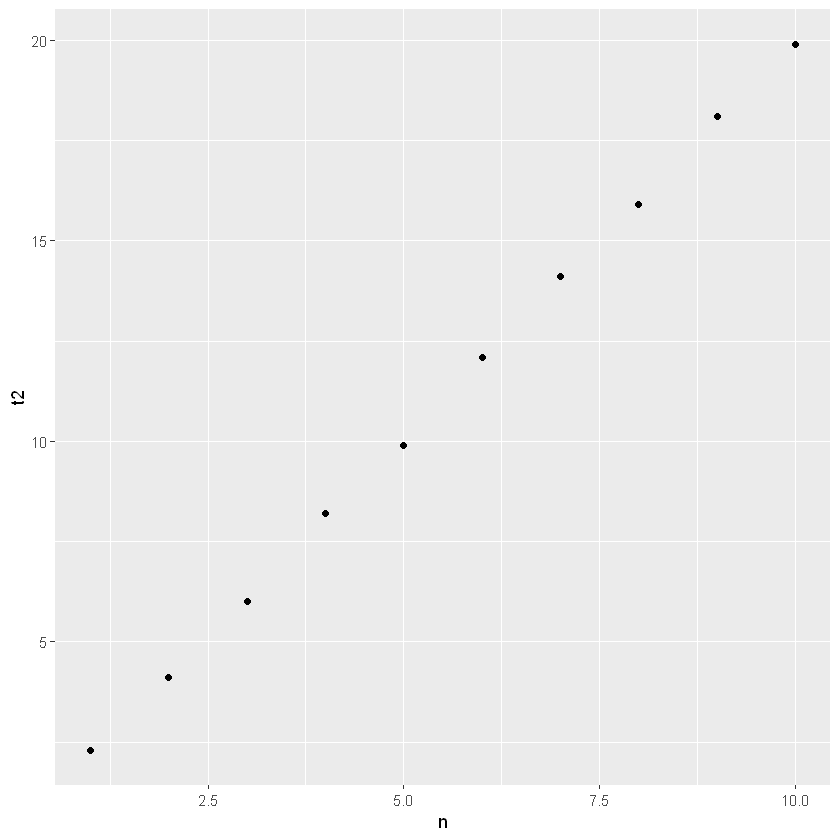

In [25]:
ggplot(results,aes(n,t2)) + geom_point()

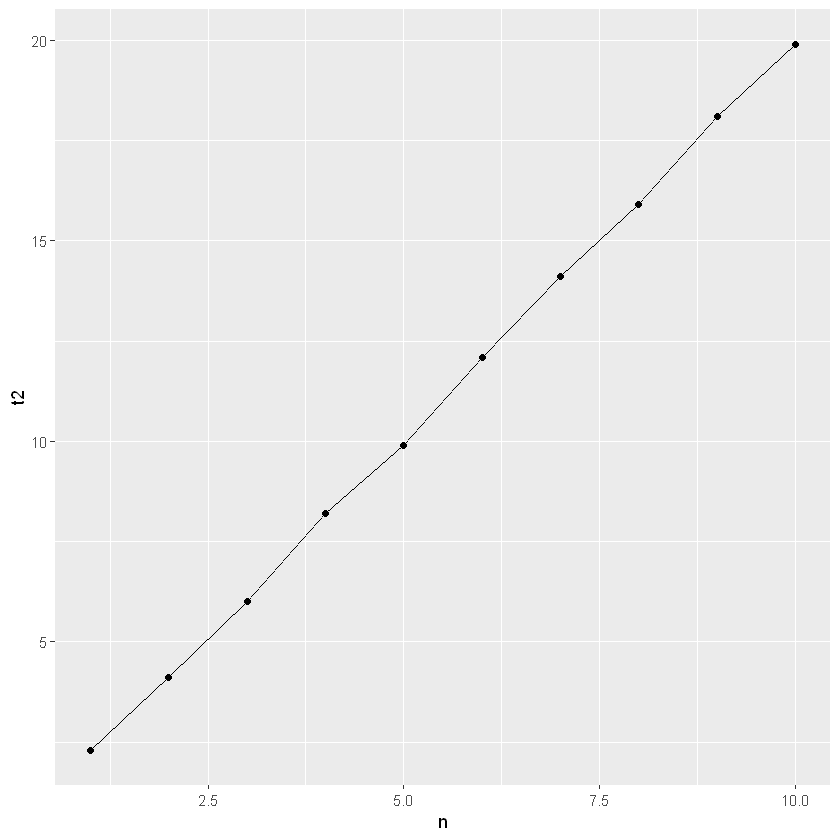

In [26]:
last_plot() + geom_line(data=results, aes(n,t2))

## Przykład analizy danych

Przetwarzanie danych w tabeli

Dane w pliku [data2.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data2.txt) mają postać tabeli faktów, w której wiersze są wynikami pomiarów. 

Przykładowo, zmierzono czas (time) dla różnych algorytmów (t1, t2).

Kolumna `alg` jest typu `factorial` - jest to typ wyliczeniowy w R.

In [27]:
results = read.csv("data2.txt")

results

n,alg,time,error
1,t1,1.010572,0.010572148
2,t1,1.981689,-0.018310993
3,t1,3.066268,0.066268043
4,t1,4.060221,0.060220570
5,t1,5.029502,0.029502051
6,t1,6.045928,0.045927536
7,t1,6.957461,-0.042538559
8,t1,8.009891,0.009891313
9,t1,9.053959,0.053959370
10,t1,9.982560,-0.017439984


Dodanie nowej kolumny:

In [28]:
results$speed = results$n / results$time

results

n,alg,time,error,speed
1,t1,1.010572,0.010572148,0.9895385
2,t1,1.981689,-0.018310993,1.0092401
3,t1,3.066268,0.066268043,0.9783880
4,t1,4.060221,0.060220570,0.9851682
5,t1,5.029502,0.029502051,0.9941342
6,t1,6.045928,0.045927536,0.9924036
7,t1,6.957461,-0.042538559,1.0061141
8,t1,8.009891,0.009891313,0.9987651
9,t1,9.053959,0.053959370,0.9940402
10,t1,9.982560,-0.017439984,1.0017470


Grupowanie (agregacja)

Przyklad: zastosowanie funkcji FUN (tutaj: mean czyli obliczającej średnią) do wszystkich wartosci time dla takich samych n i alg:

In [29]:
avg_results = aggregate( time ~ n:alg, data=results, FUN=mean)

avg_results

n,alg,time
1,t1,0.9990494
2,t1,2.0152520
3,t1,2.9867132
4,t1,3.9869472
5,t1,4.9716765
6,t1,6.0127196
7,t1,6.9400184
8,t1,8.0313431
9,t1,8.9836556
10,t1,9.9948604


Dołączenie kolumny z obliczonym odchyleniem standardowym (sd) do tabeli:

In [30]:
avg_results$sd = aggregate( time ~ n:alg, data=results, FUN=sd)$time

Agregacja kilku wielkości:

In [31]:
avg_results = aggregate( cbind(time,speed) ~ n:alg, data=results, FUN=mean) 

Filtrowanie danych:

In [32]:
avg_results[avg_results$alg=="t1",]

n,alg,time,speed
1,t1,0.9990494,1.0028054
2,t1,2.0152520,0.9928574
3,t1,2.9867132,1.0049406
4,t1,3.9869472,1.0036074
5,t1,4.9716765,1.0058149
6,t1,6.0127196,0.9979343
7,t1,6.9400184,1.0086470
8,t1,8.0313431,0.9961325
9,t1,8.9836556,1.0018430
10,t1,9.9948604,1.0005453


Rysowanie wykresów.

Wykres time w funkcji n:

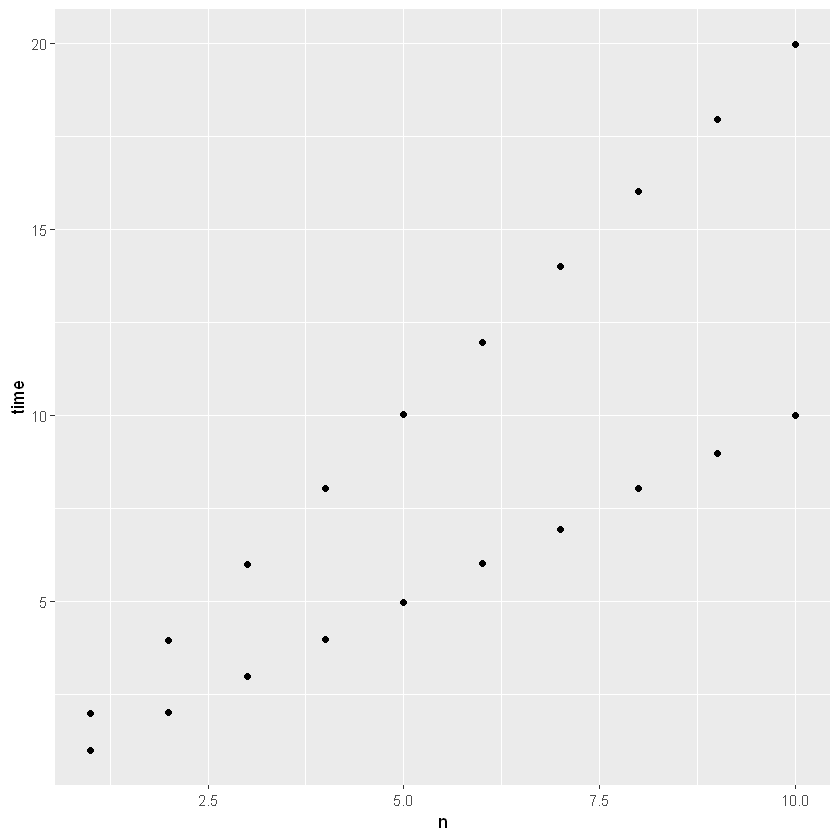

In [33]:
ggplot(avg_results, aes(n,time)) + geom_point()

Przykład skryptu rysującego wykres. Skrypt data2_plot.R uruchamiamy poleceniem:
W wersji okienkowej: Plik -> Otworz skrypt i potem "uruchom linijke lub zaznaczenie"
albo w konsoli:

In [34]:
# source("data2_plot.R")

w bashu za pomoca polecenia:

```Rscript data2_plot.R```

W wyniku powstaje plik [myplot.png](myplot.png)

## Przyklad aproksymacji wielomianami

Generujemy ciąg punktów, który będziemy aproksymować

In [35]:
x = c(32,64,96,118,126,144,152.5,158)  
y = c(99.5,104.8,108.5,100,86,64,35.3,15)
mydata = data.frame(x,y)
mydata

x,y
32.0,99.5
64.0,104.8
96.0,108.5
118.0,100.0
126.0,86.0
144.0,64.0
152.5,35.3
158.0,15.0


Fitujemy zwyklym wielomianem stopnia 3

In [36]:
fit = lm(y ~ poly(x, 3, raw=TRUE), data=mydata)

Możemy wyświetlić współczynniki wielomianu:

In [37]:
fit 


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = mydata)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
              1.269e+02               -1.626e+00                2.910e-02  
poly(x, 3, raw = TRUE)3  
             -1.468e-04  


Rysujemy wykres punktów:

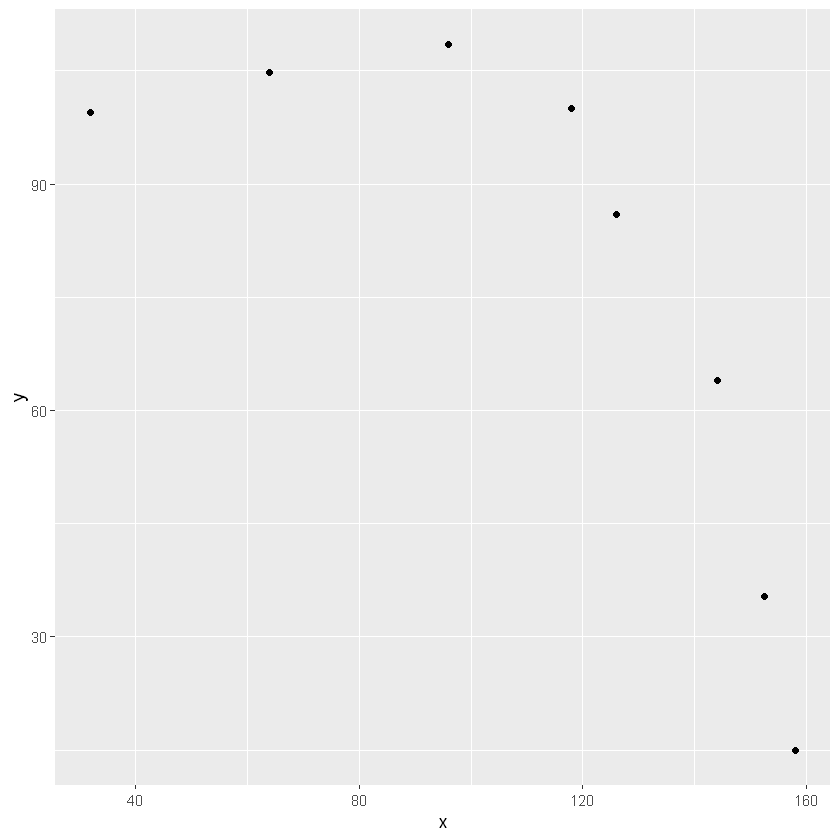

In [38]:
ggplot(mydata,aes(x,y)) + geom_point()

Generujemy gestą listę punktów dla wyliczenia wartości wielomianu aproksymujacego

In [39]:
 newdata = data.frame(x = seq(30,160, length.out=250))

Dodajemy do wykresu krzywą wielomianu

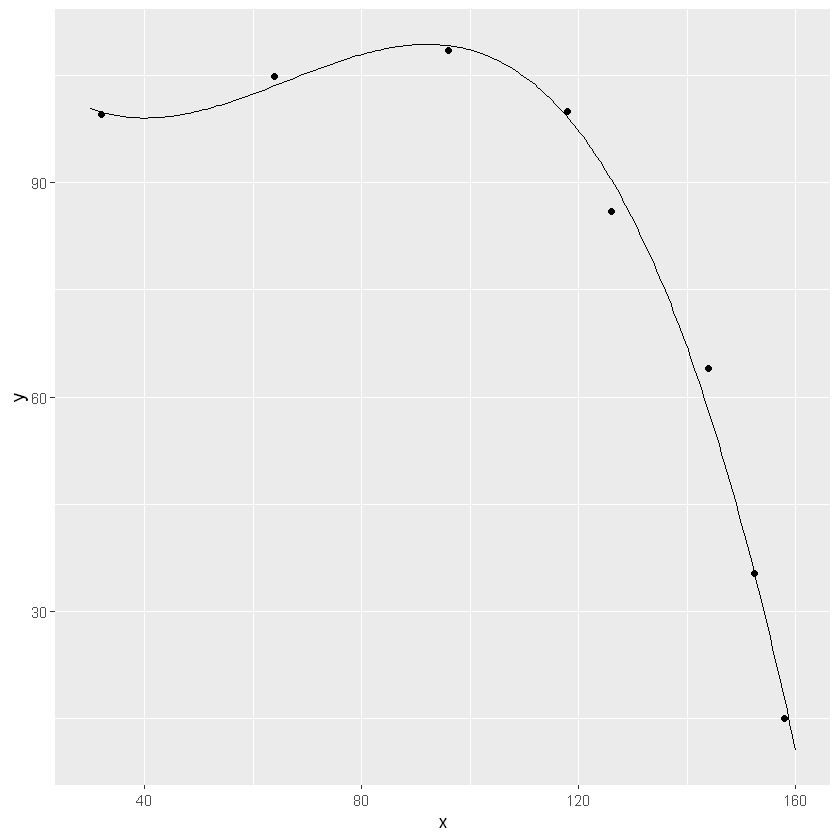

In [40]:
newdata$y = predict(fit, newdata)
last_plot() + geom_line(data=newdata, aes(x,y))

[Multiple Regression in R](http://www.statmethods.net/stats/regression.html)

## Zadanie

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)) (1p.)
2. Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)
3. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) (1p.)
4. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 (1p.)
5. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. (1p.)
6. Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem. Przykładowe źródło danych w [GoogleDoc](https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview#) lub https://ourworldindata.org/explorers/coronavirus-data-explorer. Jak zmieniają się krzywe w zależności od wybranego okresu czasu. Porównać na wykresach co najmniej 2 dopasowania (2p.)

## Zad. 1, 2, 3, 4, 5

## Read data

In [41]:
res = read.csv("results.csv")

In [42]:
# type: 
# v - vector * vector 
# m - matrix * vector

res

size,i,time,type
600,1,0.000000399,v
600,2,0.000000499,v
600,3,0.000000400,v
600,4,0.000000400,v
600,5,0.000000500,v
600,6,0.000000500,v
600,7,0.000000499,v
600,8,0.000000500,v
600,9,0.000000501,v
600,10,0.000000499,v


In [43]:
avg_res = aggregate( time ~ size:type, data=res, FUN=mean)

In [44]:
avg_res

size,type,time
600,m,0.0035152900
800,m,0.0024752801
1000,m,0.0049106100
1200,m,0.0075148997
1400,m,0.0080056697
1600,m,0.0150468504
1800,m,0.0216109599
2000,m,0.0256405897
2200,m,0.0320328101
2400,m,0.0457892802


In [45]:
# add standard deviation column
avg_res$std = aggregate( time ~ size:type, data=res, FUN=sd)$time

In [46]:
avg_res

size,type,time,std
600,m,0.0035152900,6.076092e-03
800,m,0.0024752801,1.222068e-03
1000,m,0.0049106100,9.052985e-04
1200,m,0.0075148997,2.256381e-03
1400,m,0.0080056697,1.003287e-03
1600,m,0.0150468504,1.975471e-03
1800,m,0.0216109599,1.438880e-03
2000,m,0.0256405897,1.815071e-03
2200,m,0.0320328101,4.676706e-03
2400,m,0.0457892802,3.678654e-03


In [47]:
# install.packages("ggplot2")
library("ggplot2")

In [48]:
# split into two Data Frames by type

avg_res_v = avg_res[avg_res$type=='v',]
avg_res_m = avg_res[avg_res$type=='m',]

## Plot data from Data Frames

### Dot product between two vectors

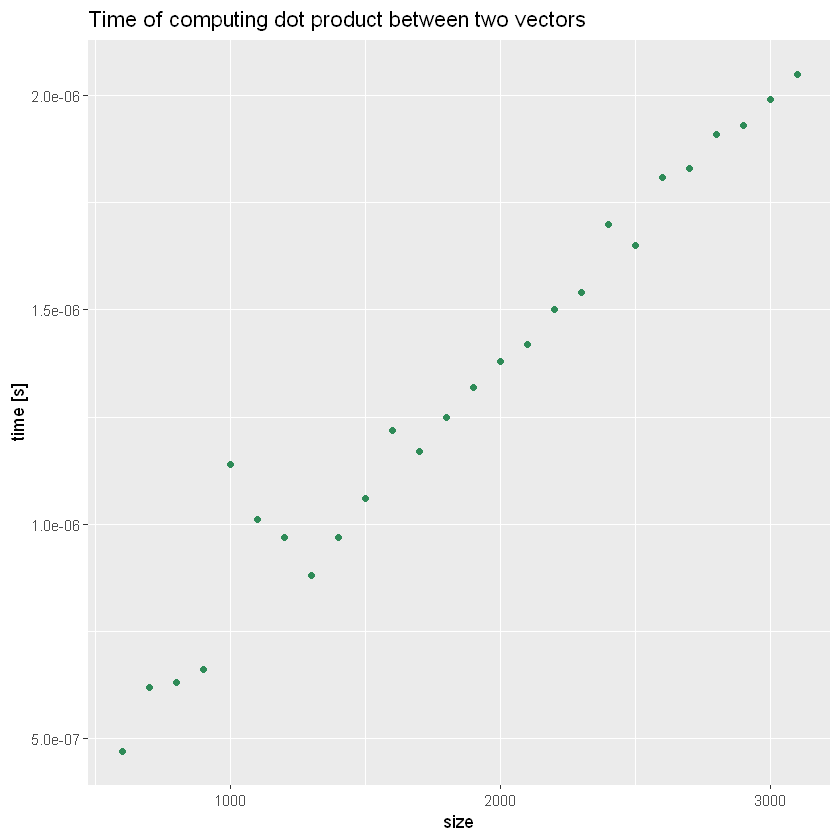

In [49]:
ggplot(avg_res_v, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Time of computing dot product between two vectors") 

### Matrix-vector product

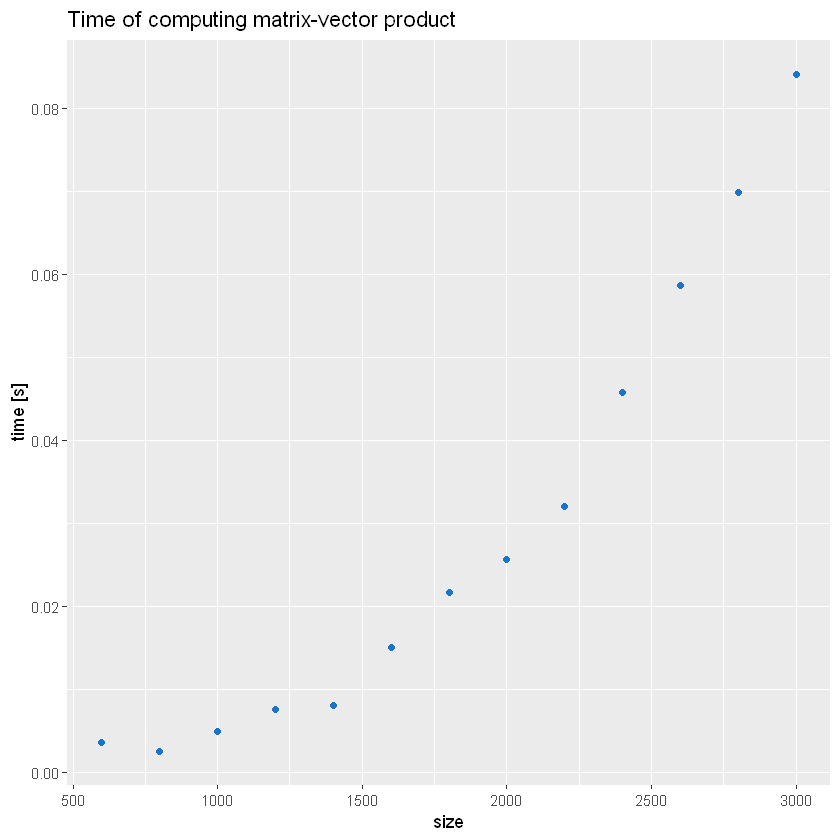

In [50]:
ggplot(avg_res_m, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Time of computing matrix-vector product")

## Plots with added error bar

### Dot product between two vectors

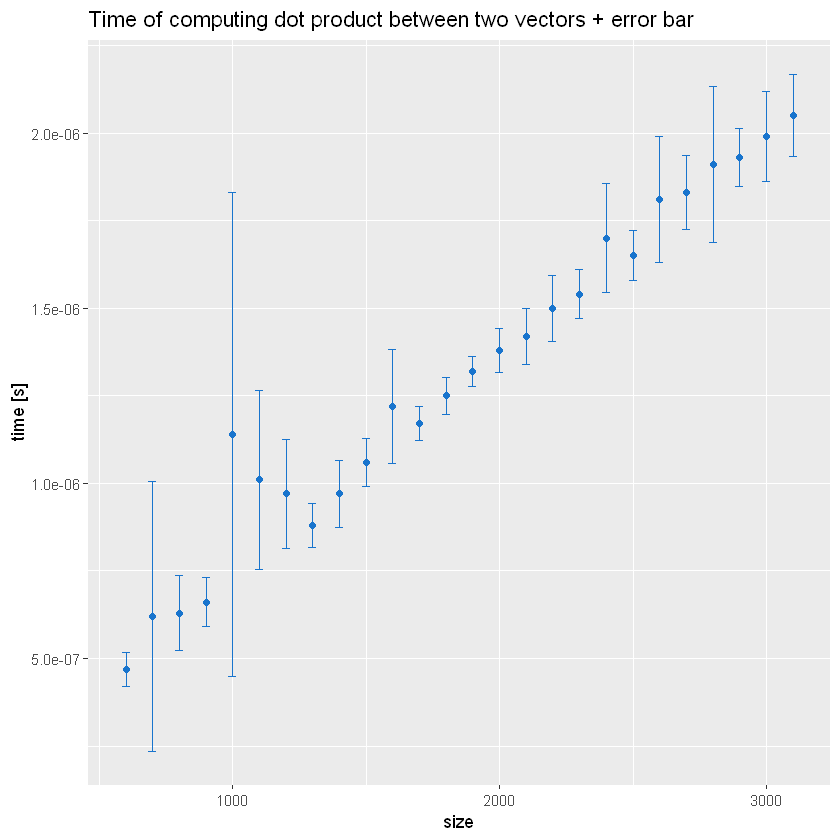

In [51]:
ggplot(avg_res_v, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Time of computing dot product between two vectors + error bar") + 
    geom_errorbar(aes(x=size, ymin=time-std, ymax=time+std), width=30, color = 'dodgerblue3', position = position_dodge(.5))


### Matrix-vector product

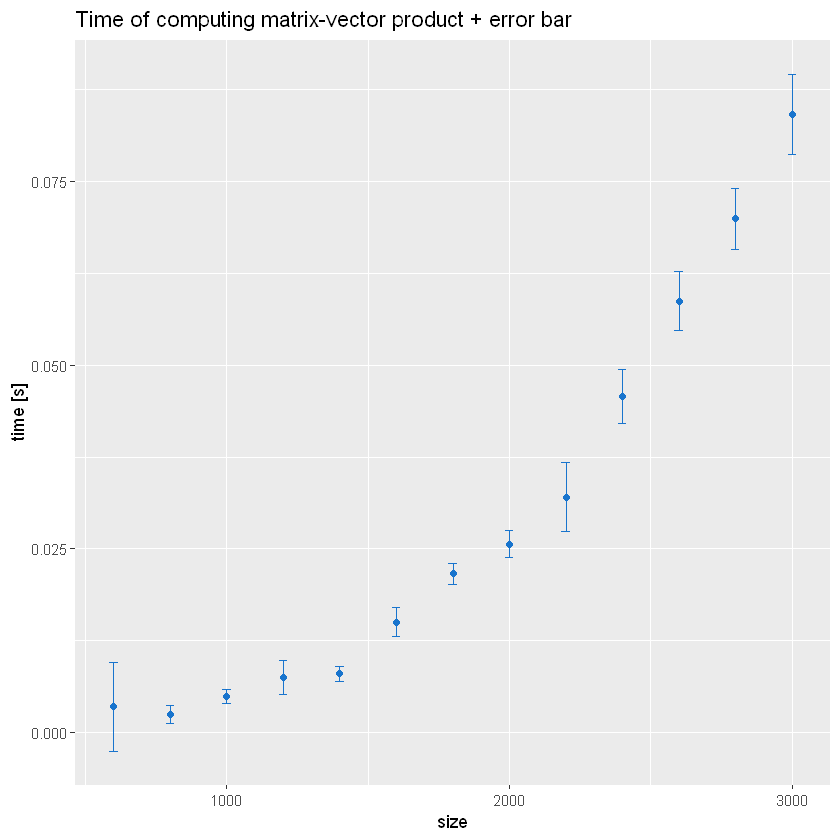

In [52]:
ggplot(avg_res_m, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Time of computing matrix-vector product + error bar") + 
    geom_errorbar(aes(x=size, ymin=time-std, ymax=time+std), width=30, color = 'dodgerblue3', position = position_dodge(.5))

## Polynomial approximation

### Dot product between two vectors

Complexity of computing dot product between two vectors is $O(n)$, so we fit linear polynomial.

In [53]:
fit = lm(time ~ poly(size, 1, raw=TRUE), data=avg_res_v)

In [54]:
fit


Call:
lm(formula = time ~ poly(size, 1, raw = TRUE), data = avg_res_v)

Coefficients:
              (Intercept)  poly(size, 1, raw = TRUE)  
                2.129e-07                  5.934e-10  


In [55]:
 newdata = data.frame(size = seq(600,3100, length.out=10000))

In [56]:
newdata$time = predict(fit, newdata)

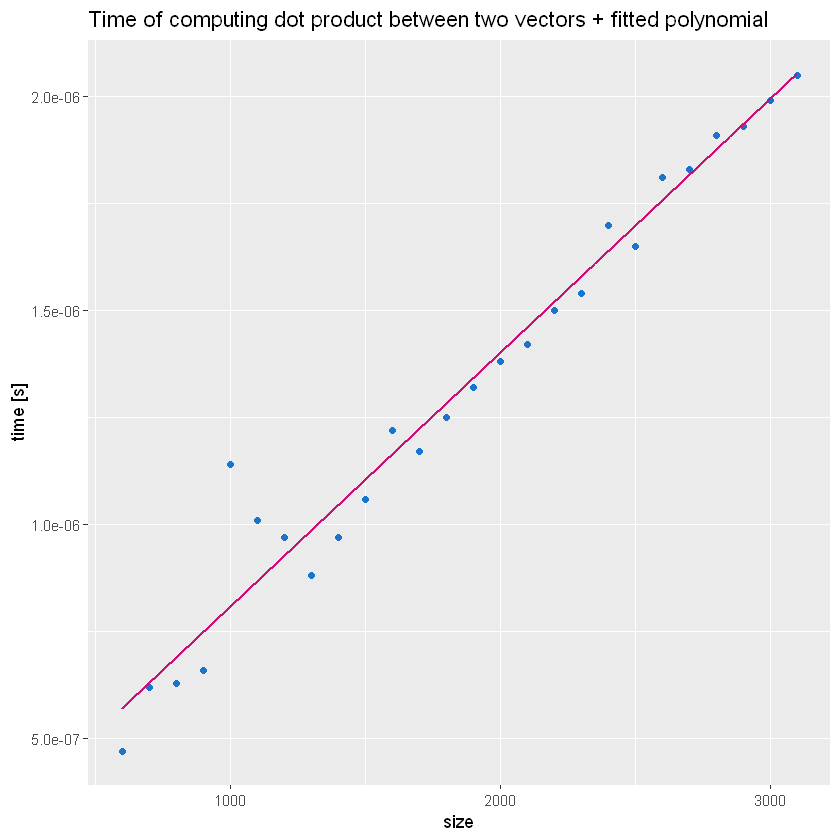

In [57]:
ggplot(avg_res_v, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Time of computing dot product between two vectors + fitted polynomial") + 
    geom_line(data=newdata, aes(size,time), color = 'deeppink3',size = .8)

### Matrix-vector product

Complexity of computing matrix-vector product is $O(n^2)$, so we fit quadratic polynomial.

In [58]:
fit = lm(time ~ poly(size, 2, raw=TRUE), data=avg_res_m)

In [59]:
fit


Call:
lm(formula = time ~ poly(size, 2, raw = TRUE), data = avg_res_m)

Coefficients:
               (Intercept)  poly(size, 2, raw = TRUE)1  
                 1.466e-02                  -2.762e-05  
poly(size, 2, raw = TRUE)2  
                 1.690e-08  


In [60]:
newdata = data.frame(size = seq(600,3100, length.out=10000))

In [61]:
newdata$time = predict(fit, newdata)

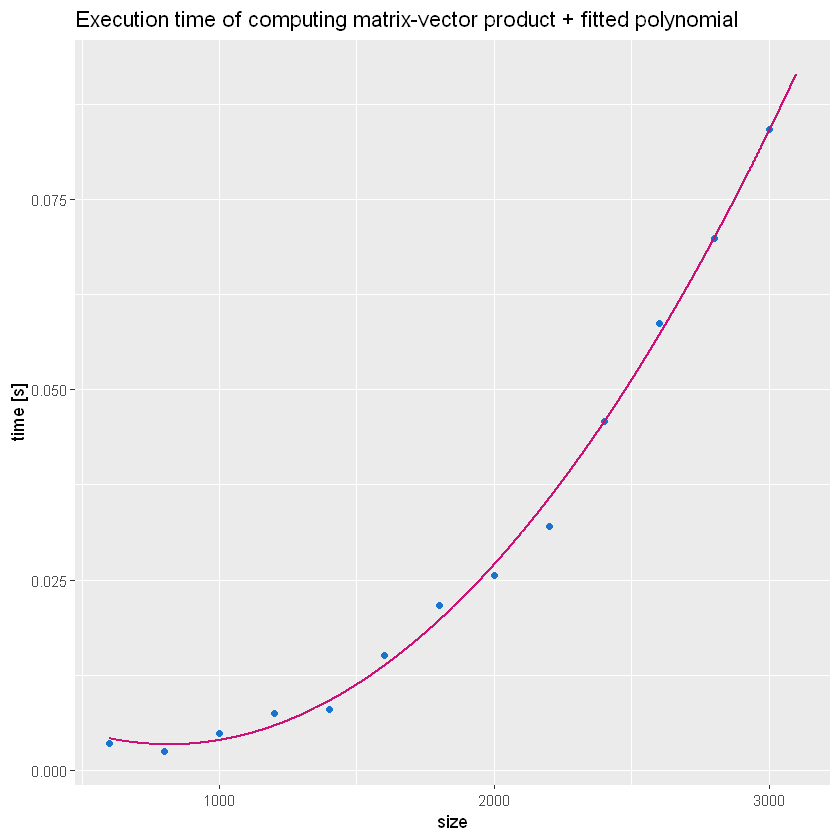

In [62]:
ggplot(avg_res_m, aes(size,time)) + geom_point(color = 'dodgerblue3') + ylab("time [s]") + 
    ggtitle("Execution time of computing matrix-vector product + fitted polynomial") + 
    geom_line(data=newdata, aes(size,time), color = 'deeppink3',size = .8)

## Zad 6.

## Daily new confirmed COVID-19 cases
### October 2020, Poland

In [63]:
covid_oct = read.csv("covid_oct2020.csv")

In [64]:
covid_oct

day,cases
1,1967
2,2292
3,2367
4,1934
5,2006
6,2236
7,3003
8,4280
9,4739
10,5300


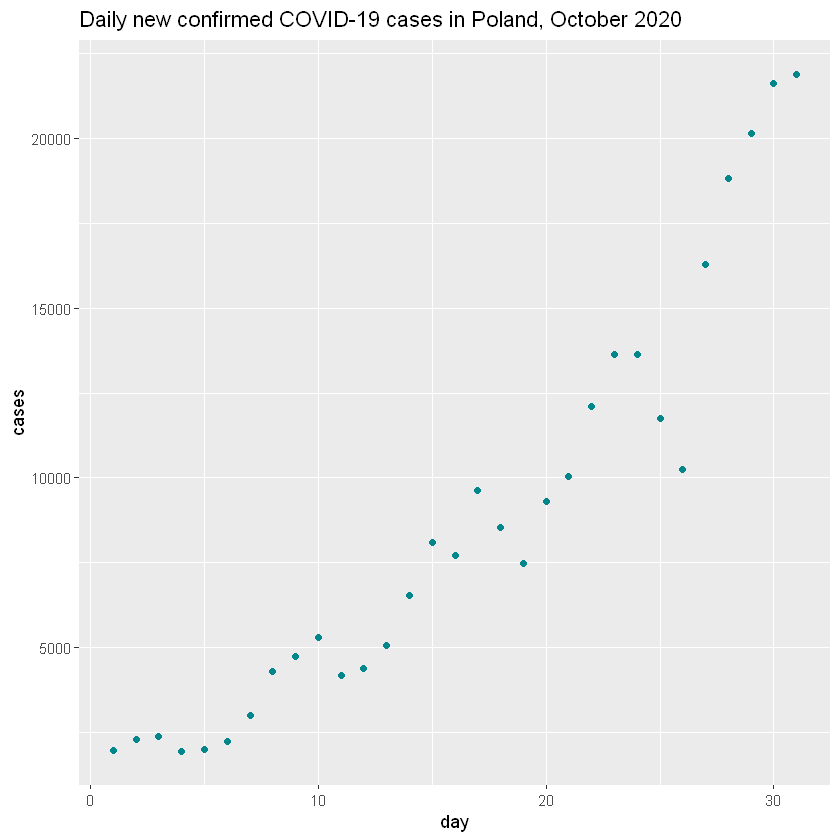

In [65]:
ggplot(covid_oct, aes(day,cases)) + geom_point(color = 'turquoise4') +
    ggtitle("Daily new confirmed COVID-19 cases in Poland, October 2020") 

### February - March 2021, Poland

In [66]:
covid_feb_mar = read.csv("covid_feb_mar2021.csv")

In [67]:
covid_feb_mar

day,cases
1,2504
2,4326
3,6801
4,6495
5,6053
6,5966
7,4725
8,2431
9,3999
10,6960


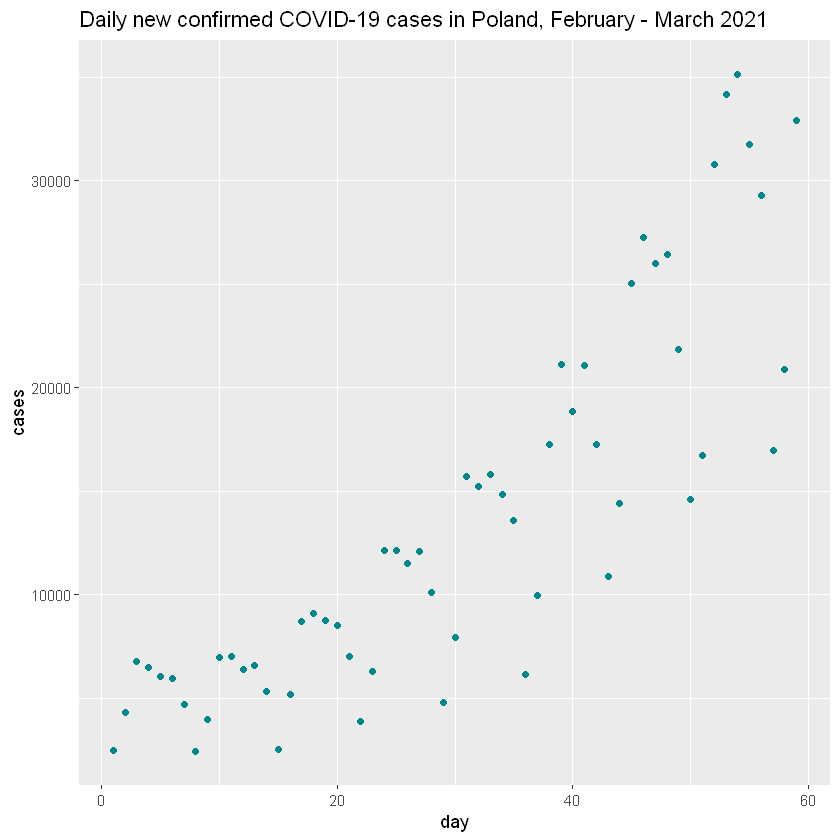

In [68]:
ggplot(covid_feb_mar, aes(day,cases)) + geom_point(color = 'turquoise4') +
    ggtitle("Daily new confirmed COVID-19 cases in Poland, February - March 2021")

## Fitting exponential curve

### October 2020, Poland

In [69]:
# Select an approximate $\theta$, since theta must be lower than min(y), and greater than zero
theta.0 <- min(covid_oct$cases) * 0.5  

# Estimate the rest parameters using a linear model
model.0 <- lm(log(cases - theta.0) ~ day, data=covid_oct)  
alpha.0 <- exp(coef(model.0)[1])
beta.0 <- coef(model.0)[2]

# Starting parameters
start <- list(alpha = alpha.0, beta = beta.0, theta = theta.0)
start

$alpha
(Intercept) 
   1045.835 

$beta
      day 
0.1021786 

$theta
[1] 967

In [70]:
model <- nls(cases ~ alpha * exp(beta * day) + theta , data = covid_oct, start = start)

In [71]:
model

Nonlinear regression model
  model: cases ~ alpha * exp(beta * day) + theta
   data: covid_oct
     alpha       beta      theta 
2397.09927    0.07248 -604.77072 
 residual sum-of-squares: 51863515

Number of iterations to convergence: 7 
Achieved convergence tolerance: 1.85e-06

In [72]:
newdata = data.frame(day = seq(1,31, length.out=1000))
newdata$cases = predict(model, newdata)

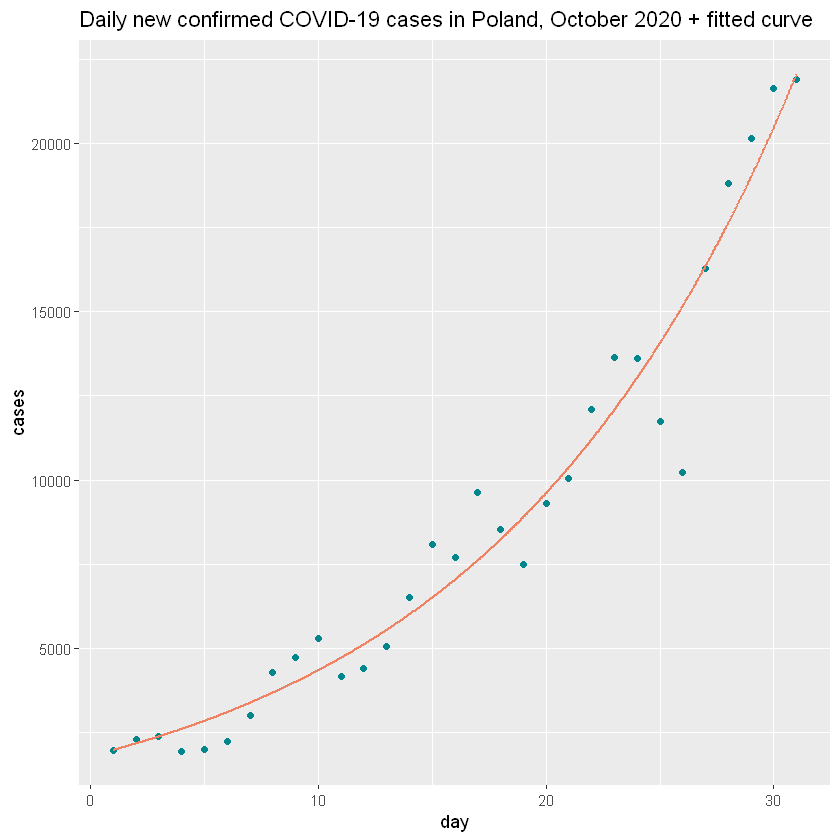

In [73]:
ggplot(covid_oct, aes(day,cases)) + geom_point(color = 'turquoise4') +
    ggtitle("Daily new confirmed COVID-19 cases in Poland, October 2020 + fitted curve") +
    geom_line(data=newdata, aes(day,cases), color = 'salmon2',size = .8)

### February - March 2021, Poland

In [74]:
# Select an approximate $\theta$, since theta must be lower than min(y), and greater than zero
theta.0 <- min(covid_feb_mar$cases) * 0.5  

# Estimate the rest parameters using a linear model
model.0 <- lm(log(cases - theta.0) ~ day, data=covid_feb_mar)  
alpha.0 <- exp(coef(model.0)[1])
beta.0 <- coef(model.0)[2]

# Starting parameters
start <- list(alpha = alpha.0, beta = beta.0, theta = theta.0)
start

$alpha
(Intercept) 
   2653.491 

$beta
       day 
0.04166916 

$theta
[1] 1215.5

In [75]:
model <- nls(cases ~ alpha * exp(beta * day) + theta , data = covid_feb_mar, start = start)

In [76]:
model

Nonlinear regression model
  model: cases ~ alpha * exp(beta * day) + theta
   data: covid_feb_mar
     alpha       beta      theta 
 6.871e+03  2.724e-02 -3.586e+03 
 residual sum-of-squares: 1.11e+09

Number of iterations to convergence: 9 
Achieved convergence tolerance: 3.976e-06

In [77]:
newdata = data.frame(day = seq(1,59, length.out=1000))
newdata$cases = predict(model, newdata)

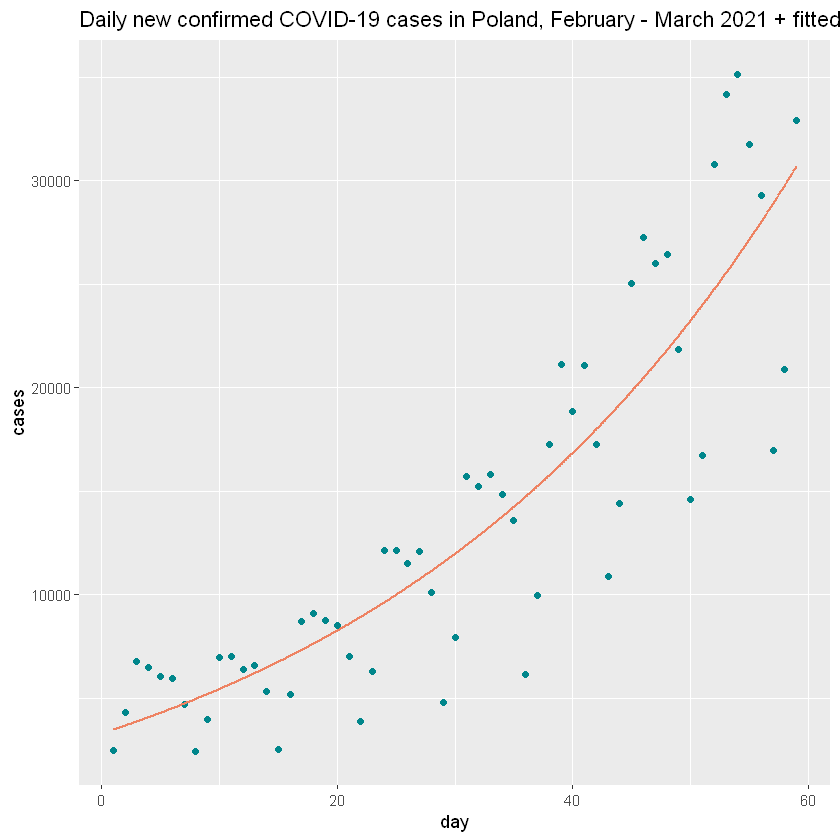

In [79]:
ggplot(covid_feb_mar, aes(day,cases)) + geom_point(color = 'turquoise4') +
    ggtitle("Daily new confirmed COVID-19 cases in Poland, February - March 2021 + fitted curve") + 
    geom_line(data=newdata, aes(day,cases), color = 'salmon2',size = .8)